In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
folder_path = "data/output2"
X_T = []
X_NT = []

In [3]:
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # Xây dựng đường dẫn tới từng file CSV
        file_path = os.path.join(folder_path, filename)
        filename = filename.split('.')[0][:2]
        df = pd.read_csv(file_path)
        df = df.drop(labels="STT", axis=1)
        if filename == "AN":
            # trang thai kho tho gan nhãn = 1
            X_NT.append(df.values)
        elif filename == "NM":
            # trang thai binh thuong
            X_T.append(df.values)       

In [21]:
print("Tổng số mẫu: ",len(os.listdir(folder_path)))
print("Mẫu thở bình thường: ",len(X_T))
print("Mẫu ngưng thở: ",len(X_NT))
print(X_T[0].shape)

Tổng số mẫu:  175
Mẫu thở bình thường:  100
Mẫu ngưng thở:  75
(200, 6)


In [24]:
# tách trục
X_T_0 = []
X_T1_0 = []
# lấy các giá trị ở trục thứ 0 trong các mẫu dữ liệu ngưng thở trong 10s (Mỗi mẫu 6 trục, mỗi tệp dữ liệu 200 mẫu -> 200 giá trị trong mảng X_T_0)
for arr1 in X_NT[0]:
    X_T_0.append(arr1[1])

# tương tự như trên nhưng trong các tệp dữ liệu thở bình thường
for arr1 in X_T[0]:
    X_T1_0.append(arr1[1])
print(len(X_T_0))

X_T_0 = X_T_0 - np.mean(X_T_0)
X_T1_0 = X_T1_0 - np.mean(X_T1_0)

    

200


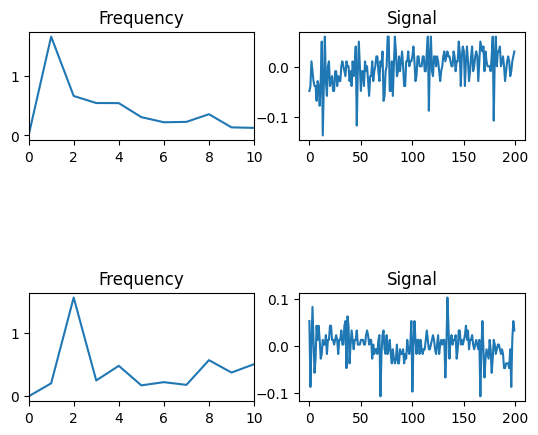

(200,)
Tần số có biên độ lớn nhất: 0.025
Tần số có biên độ lớn nhất 1: 0.05
Tần số có biên độ lớn nhất: 1
Tần số có biên độ lớn nhất 1: 2
Nhịp thở:  0.125
Nhịp thở 1:  0.25


In [25]:
F = np.fft.fft(X_T_0)
F1 = np.fft.fft(X_T1_0)

amplitude = np.abs(F)
amplitude1 = np.abs(F1)

plt.subplot(3,2,1)
plt.xlim(0,10)
plt.plot(amplitude)
plt.title('Frequency')

plt.subplot(3,2,2)
plt.plot(X_T_0)
plt.title('Signal')

plt.subplot(3,2,5)
plt.xlim(0,10)
plt.plot(amplitude1)
plt.title('Frequency')

plt.subplot(3,2,6)
plt.plot(X_T1_0)
plt.title('Signal')


plt.show()

print(amplitude.shape)

max_amplitude_index = np.argmax(amplitude)
max_amplitude_index1 = np.argmax(amplitude1)

N = len(X_T_0)  # Số lượng điểm trong tín hiệu
sampling_freq = float(N / 40)  # Tần số lấy mẫu
max_freq = float(max_amplitude_index * float(sampling_freq / N))
max_freq1 = float(max_amplitude_index1 * float(sampling_freq / N))

print("Tần số có biên độ lớn nhất:", max_freq)
print("Tần số có biên độ lớn nhất 1:", max_freq1)

print("Tần số có biên độ lớn nhất:", max_amplitude_index)
print("Tần số có biên độ lớn nhất 1:", max_amplitude_index1)

print("Nhịp thở: ", max_freq * 5)
print("Nhịp thở 1: ", max_freq1 * 5)

In [51]:
F_MAX = []
for arr2 in X_NT:
    X_T_0 = []
    for arr1 in arr2:
        for col in arr1:
            X_T_0.append(col)
        F = np.fft.fft(X_T_0)
        amplitude = np.abs(F)
        max_amplitude_index = np.argmax(amplitude)
        N = len(X_T_0)  # Số lượng điểm trong tín hiệu
        sampling_freq = float(N / 40)  # Tần số lấy mẫu
        max_freq = float(max_amplitude_index * float(sampling_freq / N))
        F_MAX.append(max_freq)

print(max(F_MAX))



0.0
